In [6]:
import os, shutil

original_dataset_dir = '/home/csle/Desktop/gilbut(케라스딥러닝)_ch5_catsanddogs/train'
base_dir = '/home/csle/Desktop/gilbut(케라스딥러닝)_ch5_catsanddogs/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [8]:
import tensorflow 
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size = 32,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print(labels_batch)
    break

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50)

In [20]:
model.save('cats_and_dogs_small_1.h5')

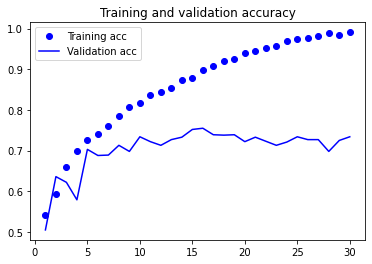

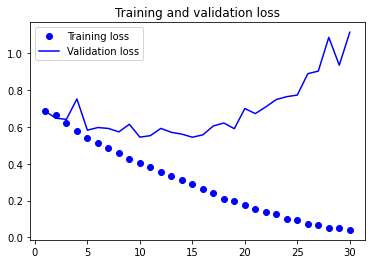

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip=True,
    fill_mode='nearest')

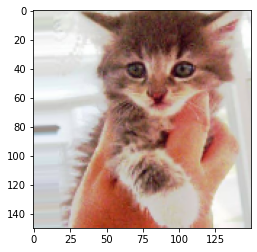

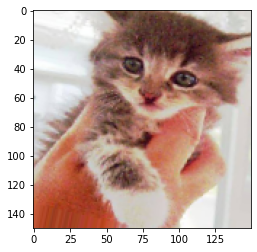

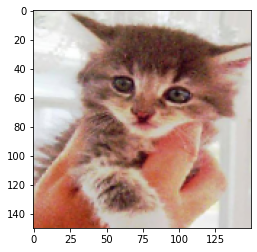

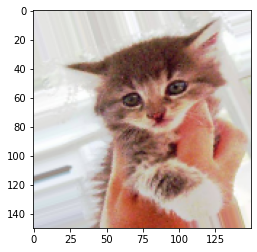

In [68]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [75]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 185ms/step - loss: 0.6540 - acc: 0.6065 - val_loss: 0.6236 - val_acc: 0.6370
Epoch 2/100
100/100 [==============================] - 18s 182ms/step - loss: 0.6482 - acc: 0.6255 - val_loss: 0.6375 - val_acc: 0.6100
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6237 - acc: 0.6465 - val_loss: 0.5890 - val_acc: 0.6910
Epoch 4/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6149 - acc: 0.6710 - val_loss: 0.5761 - val_acc: 0.6920
Epoch 5/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6083 - acc: 0.6725 - val_loss: 0.6075 - val_acc: 0.6740
Epoch 6/100
100/100 [==============================] - 19s 190ms/step - loss: 0.5981 - acc: 0.6720 - val_loss: 0.5662 - val_acc: 0.6880
Epoch 7/100
100/100 [==============================] - 19s 189ms/step - loss: 0.5892 - acc: 0.6925 -

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16133938107960385973]

In [23]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/csle/Desktop/gilbut(케라스딥러닝)-ch5/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)

validation_features, validation_labels = extract_features(validation_dir, 2000)

test_features, test_labels = extract_features(test_dir, 2000)

        

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (2000, 4*4*512))
test_features = np.reshape(test_features, (2000, 4*4*512))

In [26]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 9ms/step - loss: 0.6844 - acc: 0.5996 - val_loss: 0.4504 - val_acc: 0.8300
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 0.4474 - acc: 0.7863 - val_loss: 0.3650 - val_acc: 0.8720
Epoch 3/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3679 - acc: 0.8505 - val_loss: 0.3274 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 1s 9ms/step - loss: 0.3105 - acc: 0.8759 - val_loss: 0.3022 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2912 - acc: 0.8732 - val_loss: 0.2884 - val_acc: 0.8970
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 0.2596 - acc: 0.8985 - val_loss: 0.2727 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 0.2436 - acc: 0.9087 - val_loss: 0.2646 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 1s 8ms/step - loss: 0.

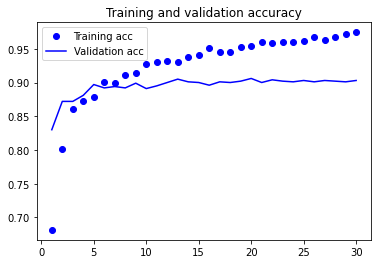

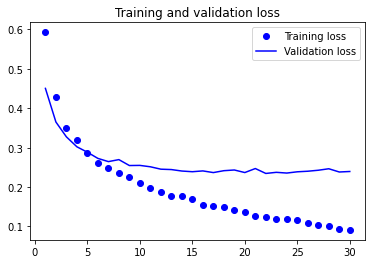

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False
          
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
     rescale = 1./255,
     rotation_range = 40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50,
    verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 69s - loss: 0.5835 - acc: 0.7020 - val_loss: 0.4493 - val_acc: 0.8260
Epoch 2/30
100/100 - 68s - loss: 0.4752 - acc: 0.7905 - val_loss: 0.3671 - val_acc: 0.8530
Epoch 3/30
100/100 - 68s - loss: 0.4312 - acc: 0.8220 - val_loss: 0.3340 - val_acc: 0.8670
Epoch 4/30
100/100 - 68s - loss: 0.4065 - acc: 0.8200 - val_loss: 0.3319 - val_acc: 0.8560
Epoch 5/30
100/100 - 68s - loss: 0.3828 - acc: 0.8210 - val_loss: 0.2985 - val_acc: 0.8880
Epoch 6/30
100/100 - 68s - loss: 0.3861 - acc: 0.8265 - val_loss: 0.2877 - val_acc: 0.8860
Epoch 7/30
100/100 - 68s - loss: 0.3537 - acc: 0.8445 - val_loss: 0.2745 - val_acc: 0.8950
Epoch 8/30
100/100 - 68s - loss: 0.3601 - acc: 0.8350 - val_loss: 0.2659 - val_acc: 0.8960
Epoch 9/30
100/100 - 68s - loss: 0.3539 - acc: 0.8520 - val_loss: 0.2633 - val_acc: 0.8970
Epoch 10/30
100/100 - 68s - loss: 0.3315 - acc: 0.8605 - val_loss: 0.2593 - val_acc: 0.9000
Epoch

In [29]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [30]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 80s 796ms/step - loss: 0.3258 - acc: 0.8549 - val_loss: 0.2438 - val_acc: 0.9050
Epoch 2/100
100/100 [==============================] - 81s 808ms/step - loss: 0.2552 - acc: 0.8893 - val_loss: 0.2131 - val_acc: 0.9190
Epoch 3/100
100/100 [==============================] - 80s 806ms/step - loss: 0.2549 - acc: 0.8876 - val_loss: 0.2069 - val_acc: 0.9250
Epoch 4/100
100/100 [==============================] - 81s 810ms/step - loss: 0.2149 - acc: 0.9113 - val_loss: 0.1964 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 81s 808ms/step - loss: 0.1936 - acc: 0.9247 - val_loss: 0.2803 - val_acc: 0.8900
Epoch 6/100
100/100 [==============================] - 80s 805ms/step - loss: 0.2005 - acc: 0.9201 - val_loss: 0.2490 - val_acc: 0.9070
Epoch 7/100
100/100 [==============================] - 80s 806ms/step - loss: 0.1873 - acc: 0.9147 - val_loss: 0.2026 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

KeyboardInterrupt: 